<a href="https://colab.research.google.com/github/rwamux/notebooks/blob/main/Copy_of_chest_xray2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
The adoption of Machine Learning in medical diagnosis is one of the most promising applications of Airtificial Intelligence(AI). This is especially relevant for low income countries where specialists like radiologists are in short supply. In this study we shall use a section of ML called Deep Learning because of the task that will involve the determination of a classification based on the observation of images.

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. The term “deep” usually refers to the number of hidden layers in the neural network. Traditional neural networks only contain 2-3 hidden layers, while deep networks can have as many as 150.

Deep learning models are trained by using large sets of labeled data and neural network architectures that learn features directly from the data without the need for manual feature extraction.
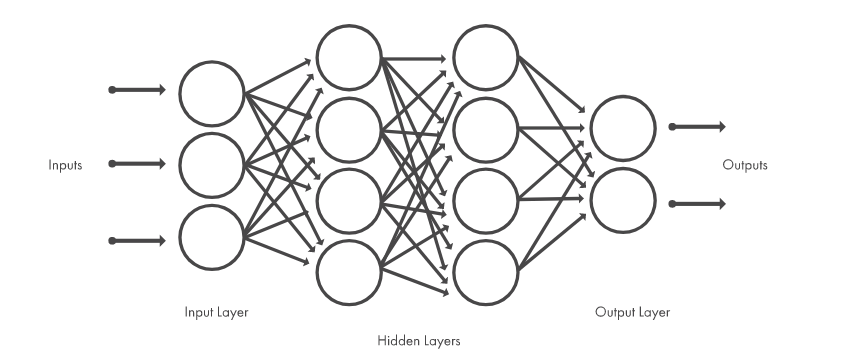

Most deep learning applications use the transfer learning approach, a process that involves fine-tuning a pretrained model. You start with an existing network, such as AlexNet or GoogLeNet, and feed in new data containing previously unknown classes. After making some tweaks to the network, you can now perform a new task, such as categorizing only dogs or cats instead of 1000 different objects. With transfer learning, we basically try to exploit what has been learned in one task to improve generalization in another. This also has the advantage of needing much less data (processing thousands of images, rather than millions), so computation time drops to minutes or hours.

We shall be using transfer learning in this work but which pretrained network should we use. Let's load a couple of them and see which one is best for our application. We are going to be using Keras framwework which is based on Tensorflow. Keras provides a number of pretrained networks and we shall load a couple of them, targetting the smaller networks due to the size of our dataset.



In [ ]:
#Import the necessary libraries
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import vgg16,vgg19,resnet_v2,mobilenet_v2,mobilenet_v3,efficientnet_v2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

We have split our data into 3 folders with each folder containing images divided into their respective classes. This arrangement will make it easy to use a generator to load our images. Generators give us the flexibility to load data in batches. This is very useful in image analysis applications because of the memory required to process an image. Instead of loading all images into memory at once, we pull them in small groups which is more efficient memory-wise.

Keras provides us with a generator(ImageDataGenerator) we can use to pull our images. We are rescaling our images to make it easier for the network to learn representations from the images. Our images have channels(Red, Green, Blue) with each channel in the range of 0-255. So we are divinding by 255 so that we can have our channels in the range of 0-1

In [ ]:
train_datagen = image.ImageDataGenerator(rescale=1./255
                                   )
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (160,160),
                                                    batch_size=10,
                                                    class_mode='binary'
                                                    )
test_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=(160,160),
                                                  batch_size=10,
                                                  class_mode= 'binary'
                                                  )

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


We are going to test 6 pretrained networks to determine which will provide us the best possible performance in our classification task. These pretrained networks are VGG16,VGG19,Resnet50V2,MobileNetV2,MobileNetV3Large,EfficientNetV2B0 and we are going to load them below. We are specifying the parameter include_top as False because these networks were trained to classify 1000 images, none of which look like our current problem. Our use case is different. We are going to use the pretrained networks as a base and add a top layer that will allow to classify our particular images

In [ ]:
vgg16_base = vgg16.VGG16(weights = 'imagenet',include_top=False,input_shape=(160,160,3))
vgg19_base = vgg19.VGG19(weights = 'imagenet',include_top=False,input_shape=(160,160,3))
resnet_base = resnet_v2.ResNet50V2(weights = 'imagenet',include_top=False,input_shape=(160,160,3))
mob2_base = mobilenet_v2.MobileNetV2(weights = 'imagenet',include_top=False,input_shape=(160,160,3))
mob3_base = mobilenet_v3.MobileNetV3Large(weights = 'imagenet',include_top=False,input_shape=(160,160,3))
effv2_base = efficientnet_v2.EfficientNetV2B0(weights = 'imagenet',include_top=False,input_shape=(160,160,3))

9420800/9406464 [==============================] - 0s 0us/step


24289280/24274472 [==============================] - 0s 0us/step


When we are loading the networks, we load their pretrained weights(learned representations from the millions of images they were exposed to in the classification of 1000 images task). We want to use these representations to help us in our classification problem. To prevent the retraining and loss of these representations, we need to prevent our pretrained network from relearning from our few images so we are setting this as below.

In [ ]:
vgg16_base.trainable = False
vgg19_base.trainable = False
resnet_base.traibale = False
mob2_base.trainable = False
mob3_base.trainable = False
effv2_base.trainable = False

Now that we have our base models, we are going to add top layers to our networks to allow them to classify our particular images. We are adding 3 layers to the base pretrained models, a layer to flatten the learned representations from for example a tensor in the form of (5,5,512) to one in the form of (5 x 5 x 512). This will make it easier to feed into our next two layers, a dropout layer which is a regularization technique to prevent the network from overfitting. This means that it will learn to classify what it has seen before but perform poorly on what it has never seen. The last layer is a fully connected layer that will return two probabilities representing the likelihood of our two classes of images

In [ ]:
model_vg16 = models.Sequential()
model_vg16.add(vgg16_base)
model_vg16.add(layers.Flatten())
model_vg16.add(layers.Dropout(0.2))
model_vg16.add(layers.Dense(2,activation='softmax'))

In [ ]:
model_vg19 = models.Sequential()
model_vg19.add(vgg19_base)
model_vg19.add(layers.Flatten())
model_vg19.add(layers.Dropout(0.2))
model_vg19.add(layers.Dense(2,activation='softmax'))

In [ ]:
model_res = models.Sequential()
model_res.add(resnet_base)
model_res.add(layers.Flatten())
model_res.add(layers.Dropout(0.2))
model_res.add(layers.Dense(2,activation='softmax'))

In [ ]:
model_mob2 = models.Sequential()
model_mob2.add(mob2_base)
model_mob2.add(layers.Flatten())
model_mob2.add(layers.Dropout(0.2))
model_mob2.add(layers.Dense(2,activation='softmax'))

In [ ]:
model_mob3 = models.Sequential()
model_mob3.add(mob3_base)
model_mob3.add(layers.Flatten())
model_mob3.add(layers.Dropout(0.2))
model_mob3.add(layers.Dense(2,activation='softmax'))

In [ ]:
model_eff = models.Sequential()
model_eff.add(effv2_base)
model_eff.add(layers.Flatten())
model_eff.add(layers.Dropout(0.2))
model_eff.add(layers.Dense(2,activation='softmax'))

Now that we have specified the architectures of our networks, we need to compile them by providing the loss function and the optimizer. The loss function calculates the error during training, which is the difference between what has been predicted by the model and the ground truth. The optimizer is then used to reduce this error allowing the model to move closer towards the ground truth with its predictions

In [ ]:
model_vg16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = 'SparseCategoricalCrossentropy',metrics=['acc'])
model_vg19.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = 'SparseCategoricalCrossentropy',metrics=['acc'])
model_res.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = 'SparseCategoricalCrossentropy',metrics=['acc'])
model_mob2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = 'SparseCategoricalCrossentropy',metrics=['acc'])
model_mob3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = 'SparseCategoricalCrossentropy',metrics=['acc'])
model_eff.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = 'SparseCategoricalCrossentropy',metrics=['acc'])

Our networks are now ready for training and we shall train them using the fit method giving it two sets of images. One will be the training set that our networks use to learn the differences between the two sets of images and the validation set which the network uses to see how accurate what it has learned is.

In [ ]:
history_16 = model_vg16.fit(train_generator,
                              steps_per_epoch = 4,
                              epochs = 25,
                              validation_data = test_generator,
                              validation_steps = 1)

Epoch 1/25
4/4 [==============================] - 5s 1s/step - loss: 2.2314 - acc: 0.5500 - val_loss: 2.3731 - val_acc: 0.4000
Epoch 2/25
4/4 [==============================] - 3s 949ms/step - loss: 1.4045 - acc: 0.6500 - val_loss: 0.3503 - val_acc: 0.8000
Epoch 3/25
4/4 [==============================] - 4s 984ms/step - loss: 0.7913 - acc: 0.6500 - val_loss: 0.3798 - val_acc: 0.8000
Epoch 4/25
4/4 [==============================] - 3s 972ms/step - loss: 0.0919 - acc: 0.9500 - val_loss: 0.4299 - val_acc: 0.8000
Epoch 5/25
4/4 [==============================] - 4s 1s/step - loss: 0.2858 - acc: 0.8750 - val_loss: 0.2374 - val_acc: 0.9000
Epoch 6/25
4/4 [==============================] - 3s 907ms/step - loss: 0.1870 - acc: 0.9500 - val_loss: 0.0317 - val_acc: 1.0000
Epoch 7/25
4/4 [==============================] - 3s 898ms/step - loss: 0.0688 - acc: 0.9750 - val_loss: 0.1260 - val_acc: 0.9000
Epoch 8/25
4/4 [==============================] - 3s 950ms/step - loss: 0.1619 - acc: 0.9500 - v

In [ ]:
history_19 = model_vg19.fit(train_generator,
                              steps_per_epoch = 4,
                              epochs = 25,
                              validation_data = test_generator,
                              validation_steps = 1)

Epoch 1/25
4/4 [==============================] - 4s 1s/step - loss: 1.4878 - acc: 0.5750 - val_loss: 0.4135 - val_acc: 0.9000
Epoch 2/25
4/4 [==============================] - 3s 901ms/step - loss: 0.7595 - acc: 0.7750 - val_loss: 0.2692 - val_acc: 1.0000
Epoch 3/25
4/4 [==============================] - 3s 926ms/step - loss: 0.3916 - acc: 0.8000 - val_loss: 0.3936 - val_acc: 0.8000
Epoch 4/25
4/4 [==============================] - 3s 931ms/step - loss: 0.3550 - acc: 0.8750 - val_loss: 0.4436 - val_acc: 0.8000
Epoch 5/25
4/4 [==============================] - 3s 985ms/step - loss: 0.2943 - acc: 0.8750 - val_loss: 0.6376 - val_acc: 0.7000
Epoch 6/25
4/4 [==============================] - 3s 926ms/step - loss: 0.0989 - acc: 1.0000 - val_loss: 0.3420 - val_acc: 0.8000
Epoch 7/25
4/4 [==============================] - 3s 931ms/step - loss: 0.1029 - acc: 0.9750 - val_loss: 0.1803 - val_acc: 0.9000
Epoch 8/25
4/4 [==============================] - 3s 975ms/step - loss: 0.1814 - acc: 0.9250 

In [ ]:
history_res = model_res.fit(train_generator,
                              steps_per_epoch = 4,
                              epochs = 25,
                              validation_data = test_generator,
                              validation_steps = 1)

Epoch 1/25
4/4 [==============================] - 9s 1s/step - loss: 3.6142 - acc: 0.5750 - val_loss: 356107424.0000 - val_acc: 0.6000
Epoch 2/25
4/4 [==============================] - 4s 1s/step - loss: 8.1419 - acc: 0.5250 - val_loss: 92722.0234 - val_acc: 0.6000
Epoch 3/25
4/4 [==============================] - 3s 882ms/step - loss: 6.2017 - acc: 0.6750 - val_loss: 21543506.0000 - val_acc: 0.5000
Epoch 4/25
4/4 [==============================] - 3s 924ms/step - loss: 0.6985 - acc: 0.6750 - val_loss: 278041696.0000 - val_acc: 0.7000
Epoch 5/25
4/4 [==============================] - 3s 917ms/step - loss: 4.5014 - acc: 0.7750 - val_loss: 4894327808.0000 - val_acc: 0.3000
Epoch 6/25
4/4 [==============================] - 3s 914ms/step - loss: 14.5742 - acc: 0.4500 - val_loss: 6044073984.0000 - val_acc: 0.5000
Epoch 7/25
4/4 [==============================] - 3s 930ms/step - loss: 13.2543 - acc: 0.4750 - val_loss: 516671648.0000 - val_acc: 0.4000
Epoch 8/25
4/4 [=========================

In [ ]:
history_mob2 = model_mob2.fit(train_generator,
                              steps_per_epoch = 4,
                              epochs = 25,
                              validation_data = test_generator,
                              validation_steps = 1)

Epoch 1/25
4/4 [==============================] - 6s 1s/step - loss: 0.6235 - acc: 0.7750 - val_loss: 1.4445 - val_acc: 0.7000
Epoch 2/25
4/4 [==============================] - 3s 917ms/step - loss: 0.5837 - acc: 0.9500 - val_loss: 3.1089 - val_acc: 0.7000
Epoch 3/25
4/4 [==============================] - 3s 934ms/step - loss: 0.3938 - acc: 0.9500 - val_loss: 2.4259 - val_acc: 0.9000
Epoch 4/25
4/4 [==============================] - 3s 881ms/step - loss: 1.4309 - acc: 0.8500 - val_loss: 0.8813 - val_acc: 0.9000
Epoch 5/25
4/4 [==============================] - 3s 955ms/step - loss: 1.2965 - acc: 0.9500 - val_loss: 6.8737 - val_acc: 0.6000
Epoch 6/25
4/4 [==============================] - 3s 951ms/step - loss: 0.5979 - acc: 0.9250 - val_loss: 3.2033 - val_acc: 0.6000
Epoch 7/25
4/4 [==============================] - 3s 973ms/step - loss: 1.2889 - acc: 0.9750 - val_loss: 6.9821 - val_acc: 0.8000
Epoch 8/25
4/4 [==============================] - 3s 951ms/step - loss: 1.3547 - acc: 0.9000 

In [ ]:
history_mob3 = model_mob3.fit(train_generator,
                              steps_per_epoch = 4,
                              epochs = 25,
                              validation_data = test_generator,
                              validation_steps = 1)

Epoch 1/25
4/4 [==============================] - 8s 1s/step - loss: 3.9611 - acc: 0.4750 - val_loss: 1.0772 - val_acc: 0.5000
Epoch 2/25
4/4 [==============================] - 3s 859ms/step - loss: 2.2942 - acc: 0.6250 - val_loss: 1.3578 - val_acc: 0.5000
Epoch 3/25
4/4 [==============================] - 3s 924ms/step - loss: 1.5703 - acc: 0.5500 - val_loss: 1.5722 - val_acc: 0.5000
Epoch 4/25
4/4 [==============================] - 3s 880ms/step - loss: 1.6789 - acc: 0.4750 - val_loss: 3.4284 - val_acc: 0.4000
Epoch 5/25
4/4 [==============================] - 3s 970ms/step - loss: 1.4488 - acc: 0.6250 - val_loss: 0.4925 - val_acc: 0.8000
Epoch 6/25
4/4 [==============================] - 4s 1s/step - loss: 0.9602 - acc: 0.6000 - val_loss: 0.7970 - val_acc: 0.6000
Epoch 7/25
4/4 [==============================] - 3s 878ms/step - loss: 0.7615 - acc: 0.5750 - val_loss: 0.6000 - val_acc: 0.8000
Epoch 8/25
4/4 [==============================] - 3s 952ms/step - loss: 0.6798 - acc: 0.7250 - v

In [ ]:
history_eff = model_eff.fit(train_generator,
                              steps_per_epoch = 4,
                              epochs = 25,
                              validation_data = test_generator,
                              validation_steps = 1)

Epoch 1/25
4/4 [==============================] - 10s 2s/step - loss: 3.9536 - acc: 0.5250 - val_loss: 10.2512 - val_acc: 0.4000
Epoch 2/25
4/4 [==============================] - 3s 947ms/step - loss: 6.4157 - acc: 0.5250 - val_loss: 5.2912 - val_acc: 0.6000
Epoch 3/25
4/4 [==============================] - 3s 944ms/step - loss: 7.2820 - acc: 0.5250 - val_loss: 1.0781 - val_acc: 0.7000
Epoch 4/25
4/4 [==============================] - 3s 893ms/step - loss: 2.6695 - acc: 0.4500 - val_loss: 2.8955 - val_acc: 0.6000
Epoch 5/25
4/4 [==============================] - 3s 982ms/step - loss: 2.0878 - acc: 0.5500 - val_loss: 0.8175 - val_acc: 0.7000
Epoch 6/25
4/4 [==============================] - 3s 971ms/step - loss: 2.8113 - acc: 0.4250 - val_loss: 1.8556 - val_acc: 0.6000
Epoch 7/25
4/4 [==============================] - 3s 857ms/step - loss: 2.5036 - acc: 0.5750 - val_loss: 2.9529 - val_acc: 0.4000
Epoch 8/25
4/4 [==============================] - 3s 909ms/step - loss: 2.0513 - acc: 0.575

After training we pick the accuracy of the training set and validation set which we will plot for the different models

In [ ]:
acc16 =history_16.history['acc']
val_acc16 = history_16.history['val_acc']

acc19 =history_19.history['acc']
val_acc19 = history_19.history['val_acc']

acc_res =history_res.history['acc']
val_res = history_res.history['val_acc']

acc_mob2 =history_mob2.history['acc']
val_mob2 = history_mob2.history['val_acc']

acc_mob3 =history_mob3.history['acc']
val_mob3 = history_mob3.history['val_acc']


acc_eff =history_eff.history['acc']
val_eff = history_eff.history['val_acc']

In [ ]:
epochs = range(1,len(acc19) + 1)

We visualize our training and validation accuracy for the different models below

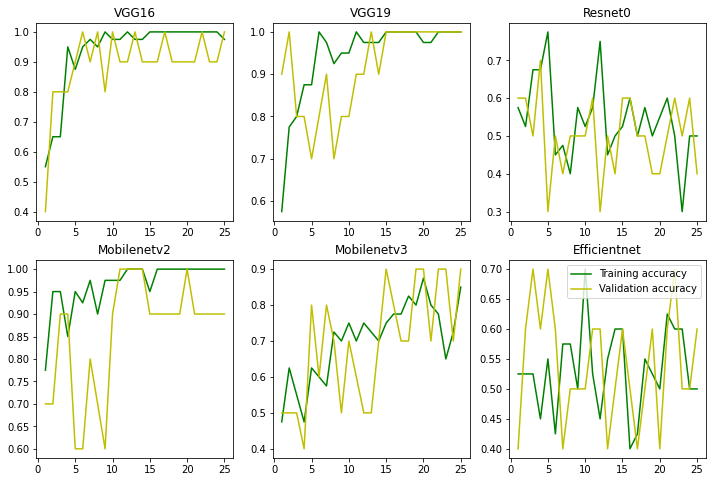

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
ax[0,0].plot(epochs,acc16,'g',label='Training accuracy')
ax[0,0].plot(epochs,val_acc16,'y',label='Validation accuracy')
ax[0,0].set(title="VGG16")

ax[0,1].plot(epochs,acc19,'g',label='Training accuracy')
ax[0,1].plot(epochs,val_acc19,'y',label='Validation accuracy')
ax[0,1].set(title="VGG19")

ax[0,2].plot(epochs,acc_res,'g',label='Training accuracy')
ax[0,2].plot(epochs,val_res,'y',label='Validation accuracy')
ax[0,2].set(title="Resnet0")

ax[1,0].plot(epochs,acc_mob2,'g',label='Training accuracy')
ax[1,0].plot(epochs,val_mob2,'y',label='Validation accuracy')
ax[1,0].set(title="Mobilenetv2")

ax[1,1].plot(epochs,acc_mob3,'g',label='Training accuracy')
ax[1,1].plot(epochs,val_mob3,'y',label='Validation accuracy')
ax[1,1].set(title="Mobilenetv3")

ax[1,2].plot(epochs,acc_eff,'g',label='Training accuracy')
ax[1,2].plot(epochs,val_eff,'y',label='Validation accuracy')
ax[1,2].set(title="Efficientnet")

plt.legend()
plt.show()

We shall also pick the training and validation loss(error) for our visualization. Remember the lower the loss the better our network is getting at classifying our images

In [ ]:
loss16 =history_16.history['loss']
val_loss16 = history_16.history['val_loss']

loss19 =history_19.history['loss']
val_loss19 = history_19.history['val_loss']

loss_res =history_res.history['loss']
val_lossres = history_res.history['val_loss']

loss_mob2 =history_mob2.history['loss']
val_lossmob2 = history_mob2.history['val_loss']

loss_mob3 =history_mob3.history['loss']
val_lossmob3 = history_mob3.history['val_loss']


loss_eff =history_eff.history['loss']
val_losseff = history_eff.history['val_loss']

We visualize the training and validation loss below

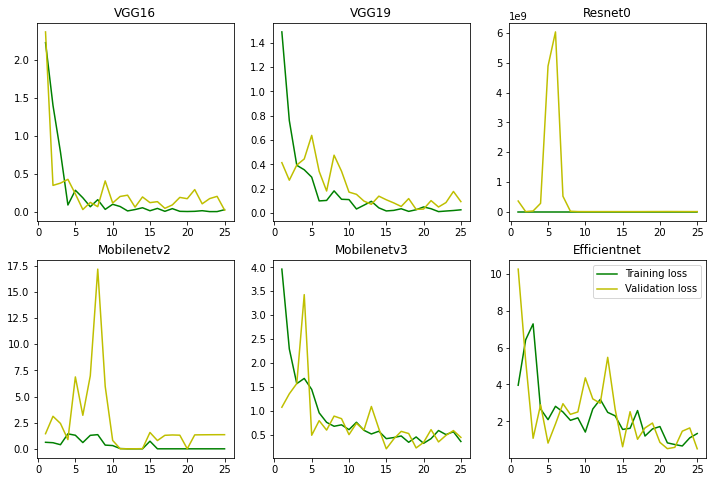

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
ax[0,0].plot(epochs,loss16,'g',label='Training loss')
ax[0,0].plot(epochs,val_loss16,'y',label='Validation loss')
ax[0,0].set(title="VGG16")

ax[0,1].plot(epochs,loss19,'g',label='Training loss')
ax[0,1].plot(epochs,val_loss19,'y',label='Validation loss')
ax[0,1].set(title="VGG19")

ax[0,2].plot(epochs,loss_res,'g',label='Training loss')
ax[0,2].plot(epochs,val_lossres,'y',label='Validation loss')
ax[0,2].set(title="Resnet0")

ax[1,0].plot(epochs,loss_mob2,'g',label='Training loss')
ax[1,0].plot(epochs,val_lossmob2,'y',label='Validation loss')
ax[1,0].set(title="Mobilenetv2")

ax[1,1].plot(epochs,loss_mob3,'g',label='Training loss')
ax[1,1].plot(epochs,val_lossmob3,'y',label='Validation loss')
ax[1,1].set(title="Mobilenetv3")

ax[1,2].plot(epochs,loss_eff,'g',label='Training loss')
ax[1,2].plot(epochs,val_losseff,'y',label='Validation loss')
ax[1,2].set(title="Efficientnet")

plt.legend()
plt.show()

In [ ]:
testing_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(160,160),
                                                  batch_size=5,
                                                  class_mode= 'binary')

Found 10 images belonging to 2 classes.


Lastly we provide images from our test set to see how our networks will perform on unseen images. Our results show that VGG19 is giving us the better accuracy and lowest loss, followed by VGG16 and MobileNetV2

In [ ]:
test_lossvg16,test_accv16 = model_vg16.evaluate(test_generator,steps=1)
test_lossvg19,test_accv19 = model_vg19.evaluate(test_generator,steps=1)
test_lossres,test_accres = model_res.evaluate(test_generator,steps=1)
test_lossmob2,test_accmob2 = model_mob2.evaluate(test_generator,steps=1)
test_lossmob3,test_accmob3 = model_mob3.evaluate(test_generator,steps=1)
test_losseff,test_acceff = model_eff.evaluate(test_generator,steps=1)

1/1 [==============================] - 1s 508ms/step - loss: 0.5575 - acc: 0.6000


In [ ]:
class_names = train_generator.class_indices

In [ ]:
class_names

{'diseased': 0, 'normal': 1}

Below we save our models using the Keras model.save format

Here we save our models using the tensorflow saved_model.save format. Both these methods save our models but they save them in different formats which determine how they can be accessed

Gradio is the library that we shall use to demo our classification algorithm so we need to install it

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 7.4 MB/s 
     |████████████████████████████████| 270 kB 74.9 MB/s 
     |████████████████████████████████| 212 kB 72.2 MB/s 
     |████████████████████████████████| 2.3 MB 53.2 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 57 kB 5.6 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 112 kB 75.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 12.1 MB/s 
     |████████████████████████████████| 68 kB 8.3 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 594 kB 75.4 MB/s 
     |████████████████████████████████| 856 kB 71

We import gradio after installation

In [ ]:
import gradio as gr

We can load the saved models like below

In [ ]:
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dropout (Dropout)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 2)                 25602     
                                                                 
Total params: 14,740,290
Trainable params: 25,602
Non-trainable params: 14,714,688
_________________________________________________________________


We can provide sample images to be used in our application

We define the class that will classify an image that is provided to our demo

In [ ]:
def classify(image):
  image = np.expand_dims(image,axis=0)
  image = image/255
  prediction = model_vgg19.predict(image)[0]

  labels = ['Diseased','Normal']
  confidences = {labels[i]:float(prediction[i]) for i in range(2)}
  return confidences

We define the gradio interface that will be displayed by our demo, providing it with the function to classify input image

In [ ]:
gr.Interface(fn = classify,
             inputs=gr.Image(shape=(160,160)),
             outputs=gr.Label(num_top_classes=2),
             examples = Examples
             ).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://18289.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fb7493ee610>,
 'http://127.0.0.1:7861/',
 'https://18289.gradio.app')

In [ ]:
testing_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(160,160),
                                                  batch_size=20,
                                                  class_mode= 'binary')

Found 78 images belonging to 2 classes.


In [ ]:
y_pred = model_vgg16.predict(testing_generator,3)

4/4 [==============================] - 27s 6s/step


In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
cm = confusion_matrix(testing_generator.classes,y_pred)

In [ ]:
import seaborn as sns

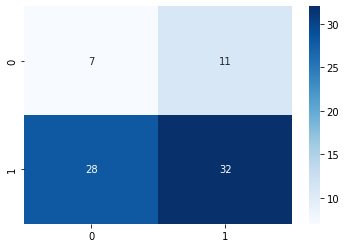

In [ ]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [ ]:
target_names = ['Diseased','Normal']

In [ ]:
print(classification_report(testing_generator.classes,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    Diseased       0.20      0.39      0.26        18
      Normal       0.74      0.53      0.62        60

    accuracy                           0.50        78
   macro avg       0.47      0.46      0.44        78
weighted avg       0.62      0.50      0.54        78

